# Breast Cancer Data Set 
# Exploring Decision Trees and Pruning 


### Kevin Kuipers
### Assignment 2
### INFS 768

##### Lets begin by loading the breast cancer data set from the sklearn.datasets library. I will also load the train_test_split command from the sklearn.model_selection library. Then using the DecisionTreeClassifier I will create a decision tree that is 100% pure, that means it will produce 100% accruacy on the training data because the leaves will be pure.

In [4]:
from graphviz import *

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


##### As expected the decision tree classifier produced a 100% accuracy on the training data. Now lets try restricting the depth of the tree so it may not be so complex and thus cause overfitting. Unpruned trees may not generalize the new incoming data as well. One way to prevent overfitting is to restrict the depth of the tree. Consequentely, this should lead to lower training data accruacy but higher test accuracy. In the decision tree classifier the max_depth will be restricted to 4. 

In [2]:
#Fitting the model with max_depth = 4
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on the test set: 0.951


##### As hypothesized the accuracy on the training set is no longer 100%. It is still very high at 98.8%. The test set accuracy went about almost by 2%. 

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

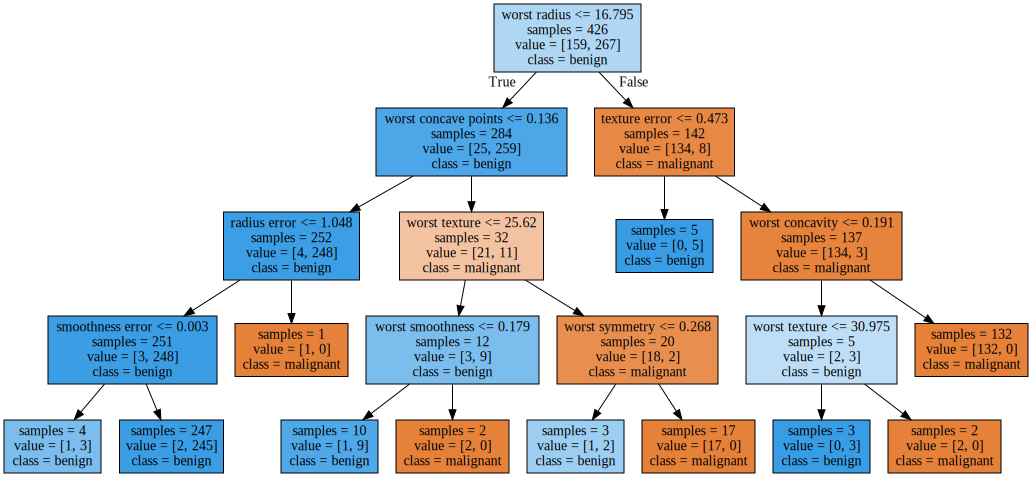

In [4]:
#Using graphviz for decision tree visuals
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant","benign"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Above is a good visualization of the tree. At each node it reveals the number of samples and value of the tumer. So from the very top the samples are 426 and 159 are benign and 267 are malignant. So if the worst radius is equal or less than 16.795 then there 284 samples where 25 are benign and 259 are malignant. This tree is relatively easy to understand and interpret however, it can be a little overwhelmning at first glance. Lets look at another method that helps summarize the variables of importantance. The features will take a value between 0 and 1 where 0 means not important at all and 1 perfectly predicts the target variable. The importances always sum up to 1. 

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


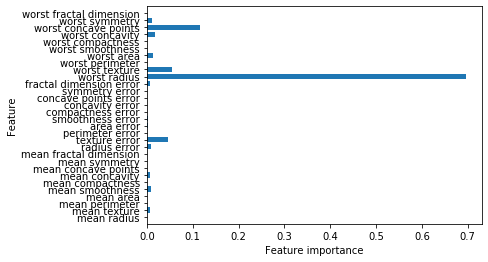

In [6]:
#Looking at the features in numeric format

print("Feature importances:\n{}".format(tree.feature_importances_))

#visualizing the importance of each feature
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

In [7]:
cancer.data.shape[1]

30

##### Quickly impecting the graph it reveals that worst radius is by far the most important feature. When looking at the decision tree graph it reveals the same insight since it is on the very top of the tree. Even though this feature is of high importantance in the tree it does not reveal wheather or not the target variable is benign or malignant. 

Feature importances: [0. 1.]


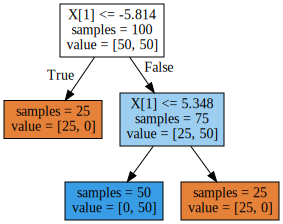

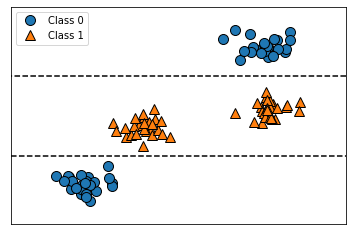

In [6]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# Compare and constrast KNN with Decision Trees



#### There are similarities and differences between the decision tree models and kNN models. For instance, they are both not able to make predictions out side the range of the training data. In contrast, kNN stores all the training data in the memory, decision trees makes a list of rules based on the training data. So they both cannot exrapolate outside the range of the training data. But the difference lies in how the deal with training data. kNN stores the training data in memory to make future predictions, DTs make a list of of rules like if else statements about the training data and it applies them to make future predictions. 

#### Another similar aspect is they both do not have make underlying assumptions about the data. Therefore, both models are considered non-parametric. A big difference is that decision trees can work with both numeric and categorical features and is used for classification. kNN can also be used for classification, however, it uses distances between the features to make predictions. So kNNs features must be numeric to acquire the distances between them. 